# Property Visualization

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style='whitegrid')

In [2]:
# import data to dataframe
df = pd.read_csv('data/Hong_Kong_Clean.csv')

/Users/kwf/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# EDA
df.shape

(429400, 27)

In [4]:
df.head()

,Unnamed: 0,addr,sqft_area,block,district,district_id,building,contract,date,floor,...,sqft_actprice,sqft_actprice_value,sqft_price,sqft_price_value,state,winloss,winloss_flag,building_address,lat,lon
0,0,BLOCK 4 2#/F Room F,522.0,BLOCK 4,Chai Wan,1257,Lok Hin Terrace,Agreement,2018-05-09,2.0,...,NaN,0.00,9579.0,9578.54,NaN,NaN,-1,Lok Hin Terrace Chai Wan,22.2634,114.2403
1,1,BLOCK 2 1/F Room J,692.0,BLOCK 2,Chai Wan,1257,Lok Hin Terrace,Agreement,2018-01-03,1.0,...,NaN,0.00,5997.0,5997.11,NaN,NaN,-1,Lok Hin Terrace Chai Wan,22.2634,114.2403
2,2,BLOCK 5 4/F Room J,590.0,BLOCK 5,Chai Wan,1257,Lok Hin Terrace,Agreement,2017-10-03,4.0,...,8898.0,8898.13,7254.0,7254.24,NaN,316.0,1,Lok Hin Terrace Chai Wan,22.2634,114.2403
3,3,BLOCK 4 1#/F Room G,712.0,BLOCK 4,Chai Wan,1257,Lok Hin Terrace,Agreement,2017-07-13,1.0,...,NaN,0.00,6865.0,6865.17,NaN,NaN,-1,Lok Hin Terrace Chai Wan,22.2634,114.2403
4,4,BLOCK 5 1#/F Room K,522.0,BLOCK 5,Chai Wan,1257,Lok Hin Terrace,Agreement,2017-06-29,1.0,...,NaN,0.00,5747.0,5747.13,NaN,6.0,1,Lok Hin Terrace Chai Wan,22.2634,114.2403


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429400 entries, 0 to 429399
Data columns (total 27 columns):
Unnamed: 0             429400 non-null int64
addr                   429400 non-null object
sqft_area              429388 non-null float64
block                  255731 non-null object
district               429400 non-null object
district_id            429400 non-null int64
building               429400 non-null object
contract               429400 non-null object
date                   429400 non-null object
floor                  428452 non-null float64
holddate               215456 non-null object
id                     429400 non-null int64
month                  429400 non-null object
price                  429400 non-null float64
price_value            429400 non-null int64
room                   425632 non-null object
source                 343042 non-null object
sqft_actprice          180597 non-null float64
sqft_actprice_value    429400 non-null float64
sqft_price    

In [6]:
df.columns

Index(['Unnamed: 0', 'addr', 'sqft_area', 'block', 'district', 'district_id',
       'building', 'contract', 'date', 'floor', 'holddate', 'id', 'month',
       'price', 'price_value', 'room', 'source', 'sqft_actprice',
       'sqft_actprice_value', 'sqft_price', 'sqft_price_value', 'state',
       'winloss', 'winloss_flag', 'building_address', 'lat', 'lon'],
      dtype='object')

In [7]:
# unnecessary columns to drop
drop_col = ['Unnamed: 0', 'state', 'holddate', 'block', 'id', 'sqft_actprice', 'winloss', 'holddate','block','source']

In [8]:
# finding missing data
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total_missing, percent_missing], axis =1, keys=['Total', 'Percent'])
missing[missing['Total'] >= 1]

,Total,Percent
state,420444,97.914299
sqft_actprice,248803,57.942012
winloss,222411,51.795762
holddate,213944,49.823940
block,173669,40.444574
source,86358,20.111318
sqft_price,55572,12.941779
room,3768,0.877503
floor,948,0.220773
sqft_area,12,0.002795


In [9]:
df = df.drop(columns=drop_col)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429400 entries, 0 to 429399
Data columns (total 19 columns):
addr                   429400 non-null object
sqft_area              429388 non-null float64
district               429400 non-null object
district_id            429400 non-null int64
building               429400 non-null object
contract               429400 non-null object
date                   429400 non-null object
floor                  428452 non-null float64
month                  429400 non-null object
price                  429400 non-null float64
price_value            429400 non-null int64
room                   425632 non-null object
sqft_actprice_value    429400 non-null float64
sqft_price             373828 non-null float64
sqft_price_value       429400 non-null float64
winloss_flag           429400 non-null int64
building_address       429400 non-null object
lat                    429400 non-null float64
lon                    429400 non-null float64
dtypes: fl

In [12]:
# change 'date' column to datetime datatype
df['date'] = pd.to_datetime(df['date'])

In [13]:
# creating 'year' column
year = df['date'].dt.year
year.rename('year',inplace=True)

0         2018
1         2018
2         2017
3         2017
4         2017
5         2017
6         2017
7         2017
8         2017
9         2016
10        2016
11        2016
12        2016
13        2016
14        2016
15        2016
16        2016
17        2016
18        2016
19        2016
20        2016
21        2016
22        2016
23        2016
24        2016
25        2016
26        2016
27        2016
28        2015
29        2015
          ... 
429370    1997
429371    1996
429372    2001
429373    2000
429374    1999
429375    1999
429376    1998
429377    1998
429378    1998
429379    1998
429380    1998
429381    1997
429382    1997
429383    1997
429384    1997
429385    1997
429386    1997
429387    1997
429388    1997
429389    1997
429390    1996
429391    1996
429392    1996
429393    1996
429394    1996
429395    1996
429396    1996
429397    1996
429398    1996
429399    1996
Name: year, Length: 429400, dtype: int64

In [14]:
# concat 'year' to dataframe
df = pd.concat([df, year], axis=1)

In [16]:
# groupby 'year' to find average 'sqft_price'
df_y = df[['sqft_price','year']].groupby('year')['sqft_price'].mean()

Text(0.5,1,'sqft_price by year')

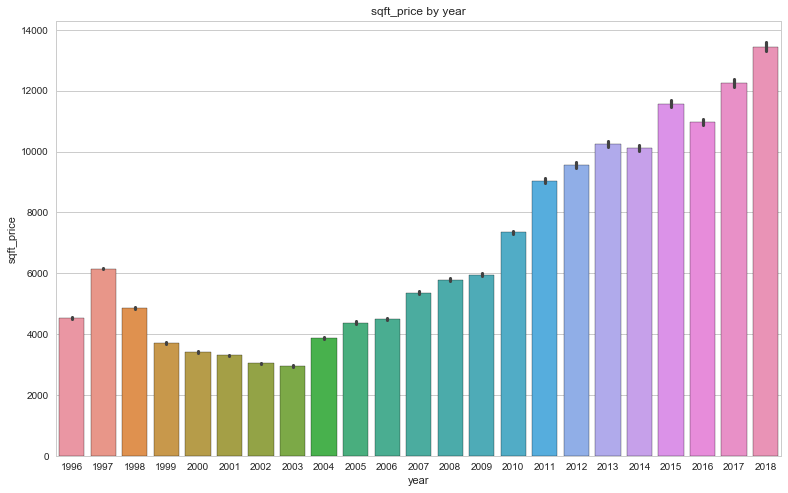

In [17]:
# barplot seaborn
plt.figure(figsize=(13,8))
sns.barplot(x='year', y='sqft_price',data=df)
plt.title('sqft_price by year')

Text(0,0.5,'price')

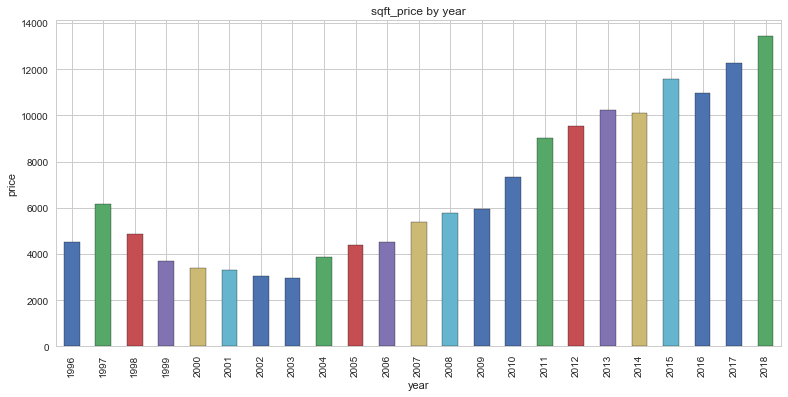

In [45]:
# barplot matplotlib
fig, axes = plt.subplots(figsize=(13,6))
df_y.plot.bar(ax=axes)
plt.title('sqft_price by year')
plt.ylabel('price')

Text(0.5,1,'total number of posting per year')

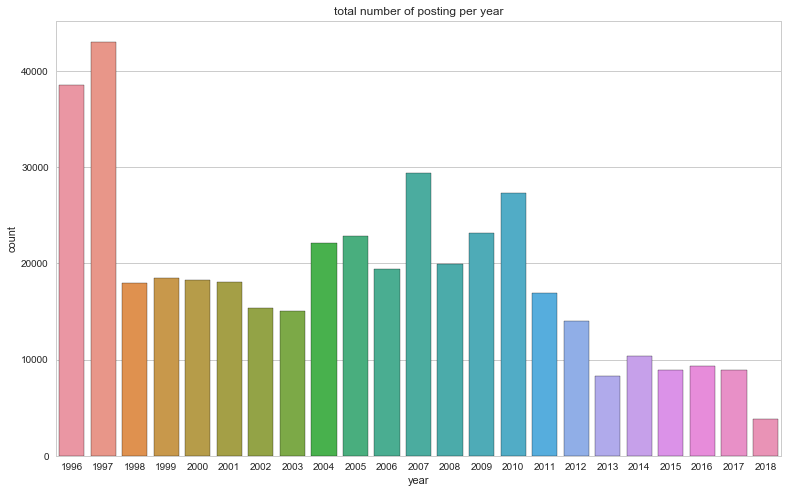

In [51]:
# number of posting by year
plt.figure(figsize=((13,8)))
sns.countplot(x='year', data = df)
plt.title('total number of posting per year')

**Plot a graph showing the price per square feet over the years.**

In [20]:
#fig, ax = plt.subplots(figsize=(13,8))


**Plot a graph showing the area per square feet against each district.**

In [28]:
# groupby 'district' to find average 'sqft_price'
df_d = df[['district', 'sqft_price']].groupby('district')['sqft_price'].mean().sort_values(ascending=True)

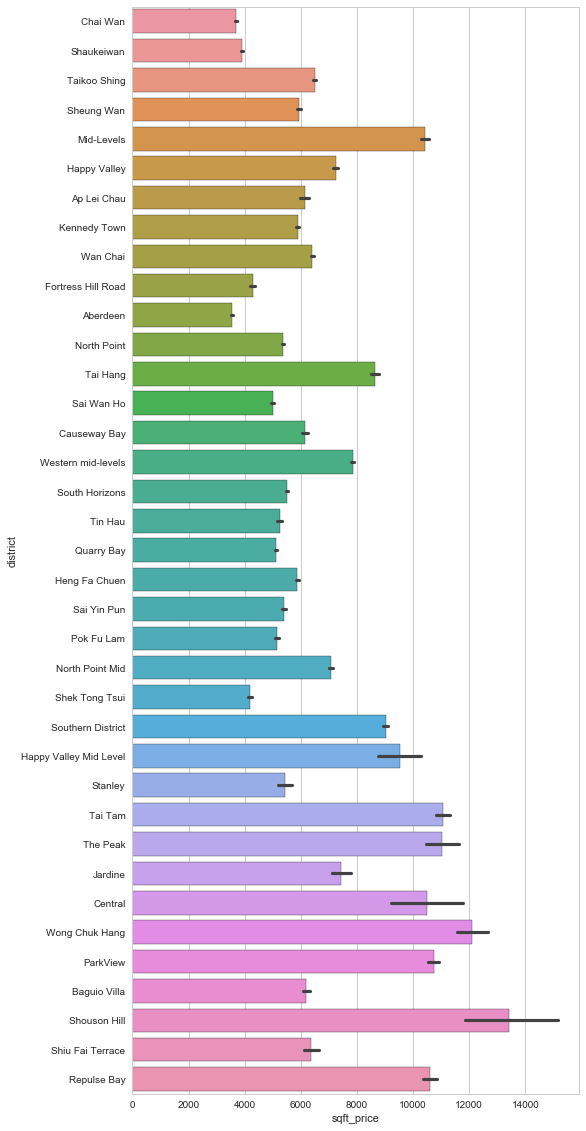

In [19]:
# barplot seaborn
plt.figure(figsize=(8,20))
sns.barplot(x='sqft_price', y='district', data=df)

Text(0.5,0,'sqft_price')

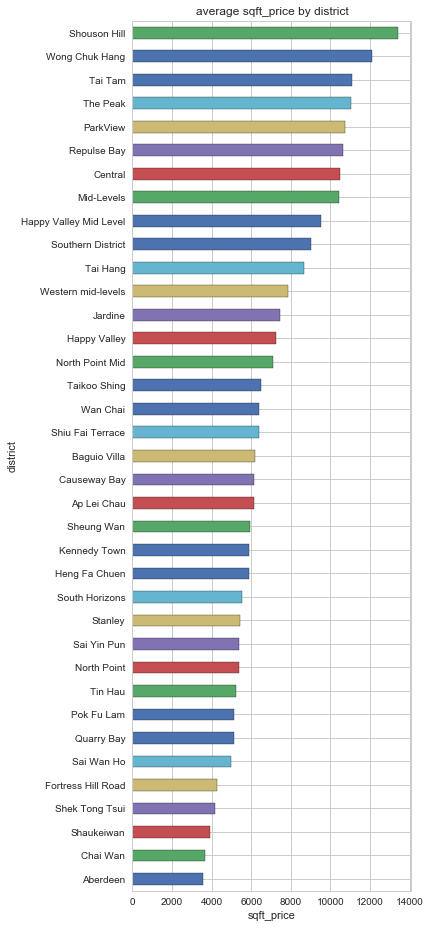

In [29]:
# barplot matplotlib
fig, axes = plt.subplots(figsize=(5,16))
df_d.plot.barh(ax=axes)
plt.title('average sqft_price by district')
plt.xlabel('sqft_price')

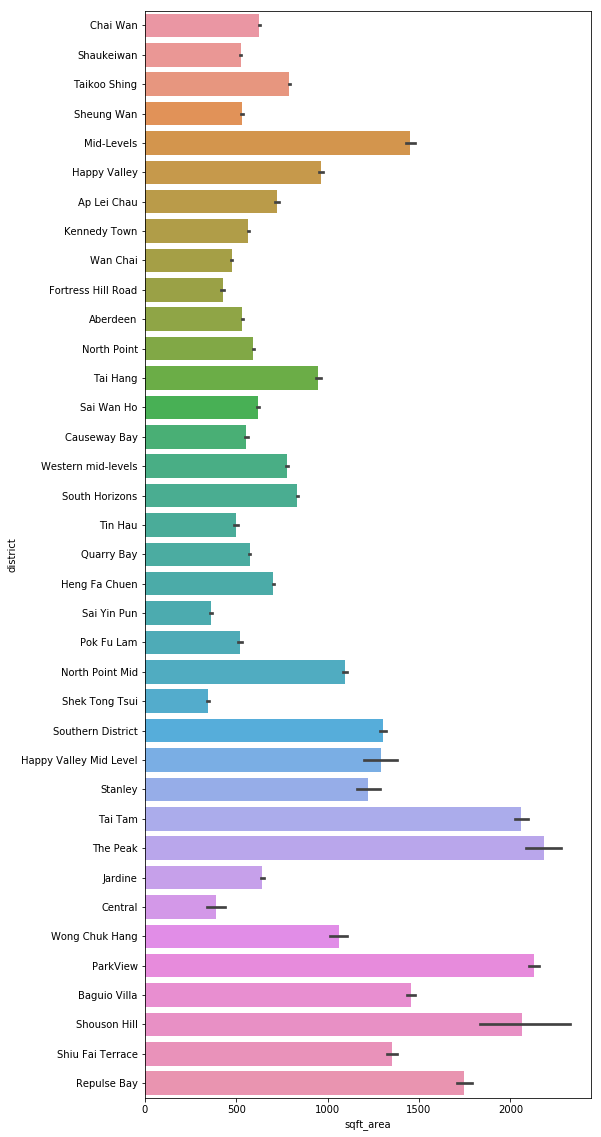

In [35]:
plt.figure(figsize=(8,20))


**Plot a graph showing relationship between floor and the price**

In [21]:
# groupby 'floo'r to find average 'price'
df_f = df[['floor', 'price']].groupby('floor')['price'].mean()

Text(0.5,1,'price by floor')

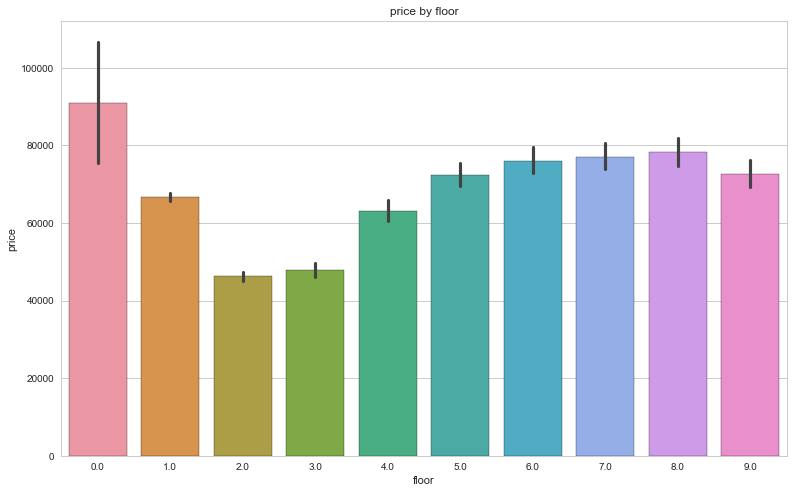

In [24]:
# barplot seaborn
plt.figure(figsize=(13,8))
sns.barplot(x='floor', y='price', data=df)
plt.title('price by floor')

Text(0,0.5,'price')

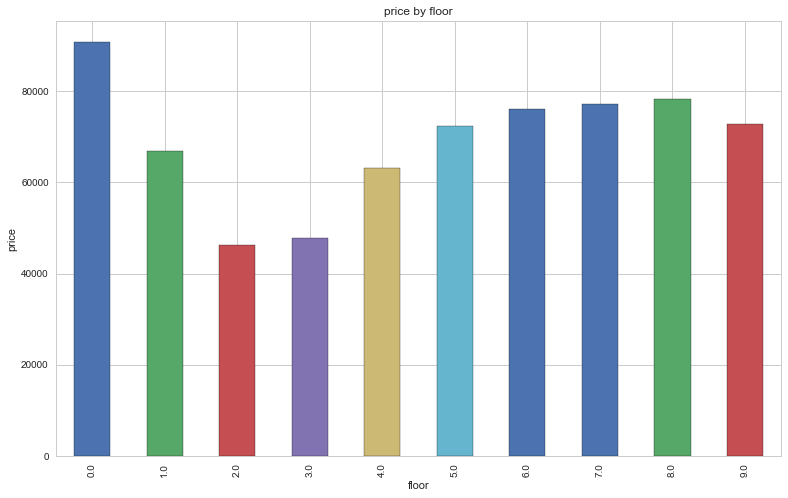

In [71]:
# barplot matplotlib
fig, axes = plt.subplots(figsize=(13,8))
df_f.plot.bar(ax=axes)
plt.title('price by floor')
plt.ylabel('price')

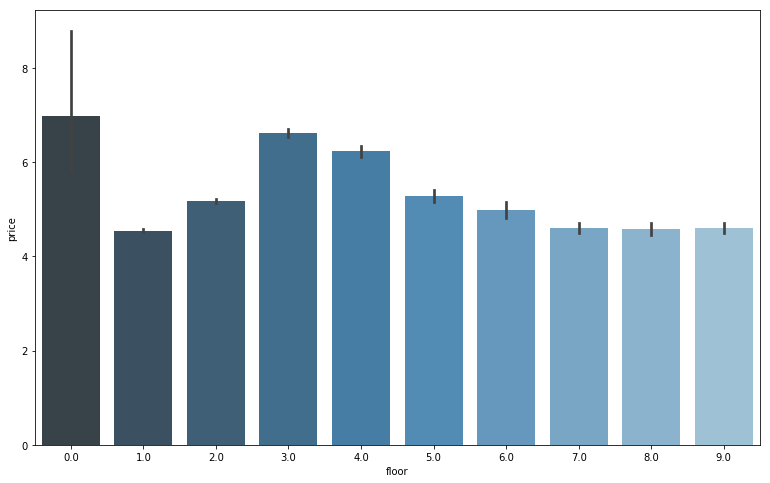

In [48]:
plt.figure(figsize=(13,8))
